<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [0]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [0]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import re

df = pd.read_csv('./data/job_listings.csv')
df['description'] = df['description'].apply(lambda text: BeautifulSoup(text, 'html.parser').get_text()) # Parsing HTML tags.

# QUESTION: how would I go about decoding the Unicode bytes - within this lambda function? o.O

df.head()

,Unnamed: 0,description,title
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist


In [0]:
ds_df = df[df['title'].str.contains('Data Scientist', flags=re.IGNORECASE)] # Dataframe for data scientist listings only.
ds_df = ds_df.reset_index(drop=True)  # Resetting index for more cleaning (DS13 addition)

In [0]:
# DS13 ALTERATION - Let's go ahead and clean this up a bit more.

for i in range(len(ds_df)):
  ds_df['description'][i] = ds_df['description'][i][2:-1]  # Removing b and beginning / ending quotes
  ds_df['description'][i] = ds_df['description'][i].replace('\\n', ' ')  # Removing line breaks.

/home/kenneth/anaconda3/envs/U4S1/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/kenneth/anaconda3/envs/U4S1/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## 2) Use Spacy to tokenize the listings 

In [0]:
# Imports

import spacy
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [0]:
# I'm going to go ahead and extend the stop words - added additional stop words (DS13)
STOP_WORDS = nlp.Defaults.stop_words.union(["job", "data", "description", 
                                            "requirements", "scientist", "you", "will",
                                            "apply", "now", "opportunity", "position",
                                            "team", "work", "experience", "science", "company",
                                            "job", "office", "located", "work", "business"])

In [0]:
tokens = []  # Empty list to populate with our tokens.

for doc in tokenizer.pipe(ds_df['description'], batch_size=300):
    
    doc_tokens = []  # Empty list to populate
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)
    
ds_df['tokens'] = tokens

ds_df.head()

,Unnamed: 0,description,title,tokens
0,0,Job Requirements: Conceptual understanding in ...,Data scientist,"[requirements:, conceptual, understanding, mac..."
1,1,"Job Description As a Data Scientist 1, you wi...",Data Scientist I,"[ , 1,, help, build, machine, learning, models..."
2,2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level,"[working, consulting, business., responsible, ..."
3,3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist,"[$4,969, $6,756, monthcontractunder, general, ..."
4,4,Location: USA \xe2\x80\x93 multiple locations ...,Data Scientist,"[location:, usa, \xe2\x80\x93, multiple, locat..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [0]:
# Imports

from sklearn.feature_extraction.text import CountVectorizer

# First, create the transformer.
vect = CountVectorizer(stop_words='english', min_df=0.025, max_df=0.75, lowercase=True)  # Toyed around with min/max_df for better intuitive understanding (DS13)

# Build Vocab
vect.fit(ds_df['description'])

# Transform the text
dtm = vect.transform(ds_df['description'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

print('Number of Times Each Word Appeared in Data Scientist listings:')
dtm.head()

Number of Times Each Word Appeared in Data Scientist listings:


,000,10,100,12,15,20,2019,25,3rd,40,...,x99t,x99ve,x9cbig,x9d,xa6,xc2,xe2,year,years,york
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,8,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


## 4) Visualize the most common word counts

In [0]:
# This will create a dataframe sorted by the most to least popular words.
most_common_words = pd.DataFrame(dtm.sum().sort_values(ascending=False))

most_common_words.reset_index(inplace=True)  # Resetting the index to replace column names

most_common_words.columns = ['word', 'count']

most_common_words.head()

,word,count
0,xe2,1336
1,x80,1323
2,learning,869
3,analytics,698
4,machine,672


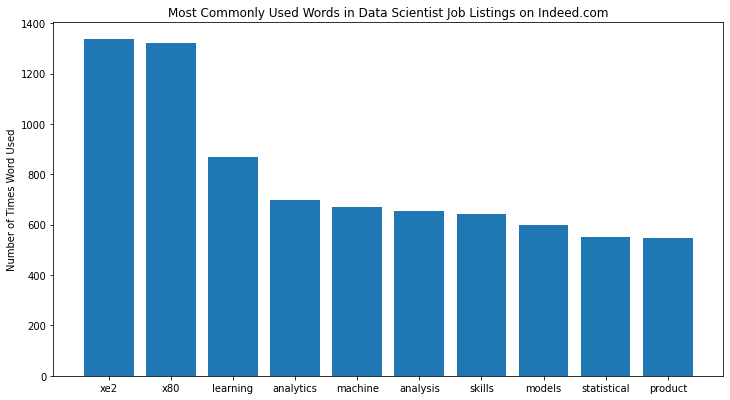

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6.5

ten_most_common_words = most_common_words.head(10)  # The 10 most common words

plt.bar(x=ten_most_common_words['word'], height=ten_most_common_words['count'])
plt.ylabel('Number of Times Word Used')
plt.title('Most Commonly Used Words in Data Scientist Job Listings on Indeed.com')
plt.show();

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [0]:
# Function from lesson
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.text.lower() not in STOP_WORDS) and (token.is_punct != True)]

In [0]:
# Imports
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate Vectorizer
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1,3),
                        max_df=.95, min_df=2, max_features=3750,
                        tokenizer=tokenize)

# Create vocabulary / get word counts
dtm = tfidf.fit_transform(ds_df['description'])

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm.head()

,,,2,3,4,5,additional,advanced,bachelor\xe2\x80\x99s,bachelor\xe2\x80\x99s degree,...,you\'ll,you\xe2\x80\x99ll,you\xe2\x80\x99ll,you\xe2\x80\x99ll develop,you\xe2\x80\x99ll need,you\xe2\x80\x99re,you\xe2\x80\x99ve,zf,|,||
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.087486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.038404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.066109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [0]:
# Import
from sklearn.neighbors import NearestNeighbors

# Fit nearest neighbors on dtm
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [0]:
# Create query for description of ideal data science job

job_desc = ["""use effective data analytics skills and practices to develop, maintain, and improve 
reporting for marketing, and predictive modeling for forecasting future results and potential additions 
to our eCommerce solutions. You will collaborate with sales leadership and advise on opportunities to improve 
upon conversion rates, as well as evaluate execution and performance of marketing events 
based upon lead generation, PPC, and margin attributing to the overall efforts of marketing ROI, and offer potential
solutions to improve marketing efforts and convey predictions for these results using visualization techniques
including matplotlib and plotly. The individual in this position may also work on recommendation engines
to help decrease website bounce rate and increase revenue."""]

query = tfidf.transform(job_desc)

query

<1x3750 sparse matrix of type '<class 'numpy.float64'>'
	with 55 stored elements in Compressed Sparse Row format>

In [0]:
descriptions = nn.kneighbors(query.todense())[1]

In [0]:
# DS13 Update

print('Top Five Positions Relative to Query: \n\n')

for i in range(len(descriptions[0])):
    descr = descriptions[0][i]
    print(f'Description #{i + 1}:')
    print(ds_df['description'][descr])
    print('======================================================================')  # Readability
    print()  # For further improved readability

Top Five Positions Relative to Query: 


Description #1:
Here at Universal Parks & Resorts\xe2\x84\xa2, you can enjoy an exciting culture where creating our unique Universal brand of thrilling experiences is a top priority. We are passionate about what we do and take pride in the exclusive ways we deliver fun.  Comprised of Universal Orlando Resort, Universal Studios Hollywood, Universal Studios Japan, Universal Studios Singapore, and a new destination coming in Beijing, China; we are proud to offer a universe of extraordinary opportunities. It takes a special kind of person to work at all of our destinations. We value individuals who know how to be part of a team, who embrace fun and are serious about their work. It takes hard work, dedication, knowledge and just the right amount of Universal spirit to open our doors of opportunity. We champion the power of cultural diversity and inclusion and continuously strive to maintain a team that is a reflection of our global audience.  Being a

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 